<a href="https://colab.research.google.com/github/codeofarmour/prog_books_da_project/blob/master/Books_About_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Books About Programming Data Analysis**
Exploratory Data Analysis of a dataset containing information about programming books. This analysis will examine book ratings, popularity based on reviews, and book prices. This analysis also compares prices of top-rated Python Programming and Data Analysis books.

In [5]:
# Import necessary libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set default graph size and general appearance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'


In [6]:
# Import dataset and store it as a pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/codeofarmour/prog_books_da_project/master/prog_book.csv')

In [7]:
# Display the first and last five rows
df

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
...,...,...,...,...,...,...,...
266,3.76,0,3D Game Engine Architecture: Engineering Real-...,Dave Eberly's 3D Game Engine Design was the fi...,752,Hardcover,203.108823
267,3.94,22,An Introduction to Database Systems,"Continuing in the eighth edition, An Introduct...",1040,Paperback,212.097059
268,4.49,36,"The Art of Computer Programming, Volumes 1-3 B...",Knuth's classic work has been widely acclaimed...,896,Boxed Set - Hardcover,220.385294
269,4.77,4,"The Art of Computer Programming, Volumes 1-4a ...","""The bible of all fundamental algorithms and t...",3168,Hardcover,220.385294


In [8]:
# Check for missing values
df.isna().sum()

Rating             0
Reviews            0
Book_title         0
Description        0
Number_Of_Pages    0
Type               0
Price              0
dtype: int64

In [9]:
# Check for duplicate rows
df.duplicated().sum()

0

In [10]:
# Display DataFrame info in detail: row count, column count, column names, non-null values, datatypes, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [11]:
# 'Reviews' are type object but should be type int64
# Must first remove ',' from the str object before converting it to an int
df['Reviews'] = df['Reviews'].str.replace(',', '')

# Convert 'Reviews' str type to type int64
df['Reviews'] = df['Reviews'].astype('int64')

In [12]:
# Verify that type conversion has occurred
df.dtypes['Reviews']

dtype('int64')

In [13]:
# Rename specific columns for brevity and clarity
df.rename(columns={'Book_title': 'Title', 'Number_Of_Pages': 'Pages'}, inplace=True)

In [14]:
# Verify that the renaming of columns was successful
df.columns[2:5:2]

Index(['Title', 'Pages'], dtype='object')

In [15]:
# Display statistics of numerical columns
df.describe()

,Rating,Reviews,Pages,Price
count,271.000000,271.000000,271.000000,271.000000
mean,4.067417,185.557196,475.077491,54.541860
std,0.290749,552.122252,306.147492,35.711485
min,3.000000,0.000000,50.000000,9.323529
25%,3.915000,5.500000,289.000000,30.751471
50%,4.100000,35.000000,384.000000,46.317647
75%,4.250000,116.500000,572.500000,67.854412
max,5.000000,5938.000000,3168.000000,235.650000


In [16]:
# Round Price column to two decimal points
df['Price'] = df['Price'].apply(lambda x: round(x, ndigits=2))

In [17]:
# Verify Price looks as it should
df.head(2)

,Rating,Reviews,Title,Description,Pages,Type,Price
0,4.17,3829,The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.32
1,4.01,1406,"The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.00


In [18]:
# Display how many of each type of book in entire dataset
df['Type'].value_counts()

Paperback                156
Hardcover                 95
Kindle Edition            10
ebook                      7
Unknown Binding            2
Boxed Set - Hardcover      1
Name: Type, dtype: int64

In [19]:
ratings = df.groupby('Type').sum()

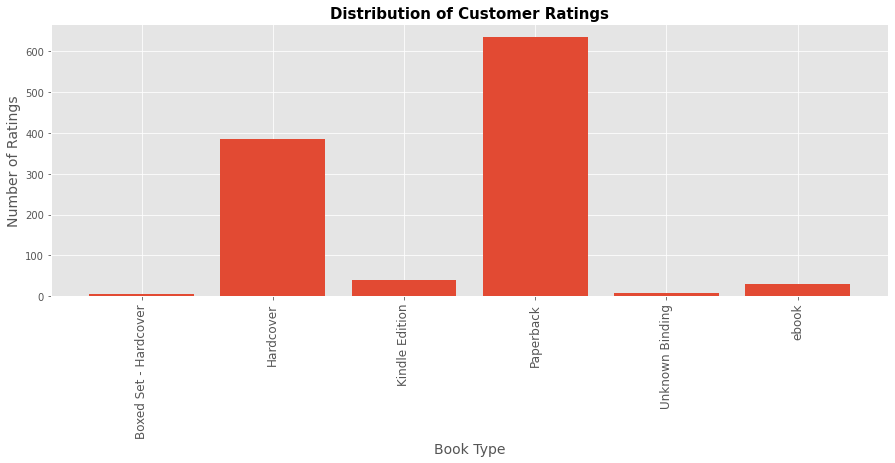

In [53]:
# Question 1: What is the distribution of customer ratings?
# Bar chart to compare distribution of customer ratings per book type

types = [type for type, df in df.groupby('Type')]

plt.bar(types, ratings['Rating'])

plt.title('Distribution of Customer Ratings', size=15, fontweight='bold')
plt.xticks(types, rotation='vertical', size=12)
plt.xlabel('Book Type', size=14)
plt.ylabel('Number of Ratings', size=14)

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


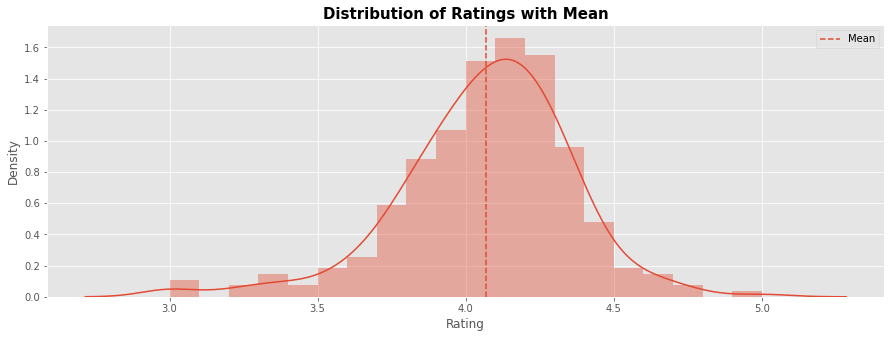

In [42]:
# Plot the mean rating
plt.axvline(x = np.mean(df['Rating']), ls='--', label='Mean')
sns.distplot(df['Rating'])

plt.title('Distribution of Ratings with Mean', size=15, fontweight='bold')

plt.legend()
plt.show()

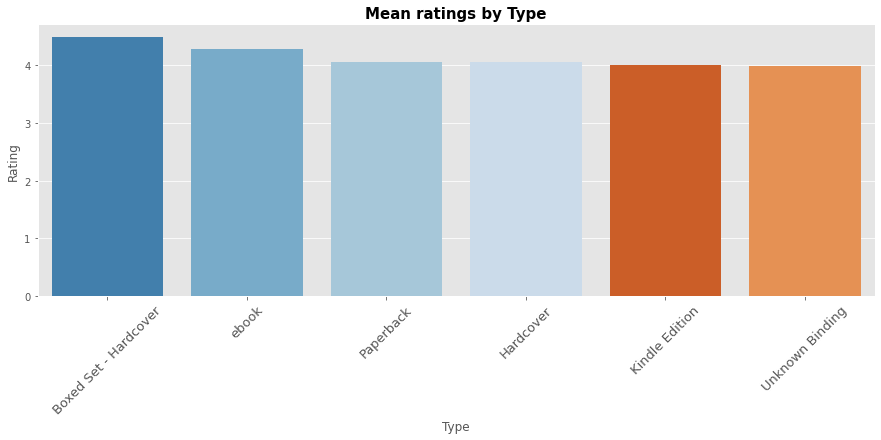

In [58]:
# Plot the mean rating by Type
mean_of_type = df.groupby('Type').mean().sort_values(by='Rating', ascending = False)

# plt.figure(figsize=(10, 5))
mean_bar = sns.barplot(x=mean_of_type.index, y = 'Rating', data = mean_of_type, palette = 'tab20c')
mean_bar.set_title('Mean ratings by Type', fontsize = 15, fontweight='bold')
mean_bar.set_xticklabels(mean_bar.get_xticklabels(), rotation = 45, horizontalalignment = 'center', fontsize=13)

mean_bar

In [59]:
# Median ratings by Type 
median_of_type = df.groupby('Type').median().sort_values(by='Rating', ascending = False)

In [24]:
# Mean price of programming books in this dataset
mean_df_price = df['Price'].mean()
mean_df_price = round(mean_df_price)
mean_df_price

55

In [25]:
# Median price of programming books in this dataset
median_df_price = df['Price'].median()
median_df_price = round(median_df_price)
median_df_price

46

In [26]:
# Mode price of programming books in this dataset
mode_df_price = df['Price'].mode()
mode_df_price = round(mode_df_price)
mode_df_price

0    51.0
dtype: float64

In [27]:
# price = df['Price']
# price

In [28]:
# Calculate measures of central tendency (mean, median, mode)
df.mean()

Rating       4.067417
Reviews    185.557196
Pages      475.077491
Price       54.541661
dtype: float64

Text(0, 0.5, 'Books')

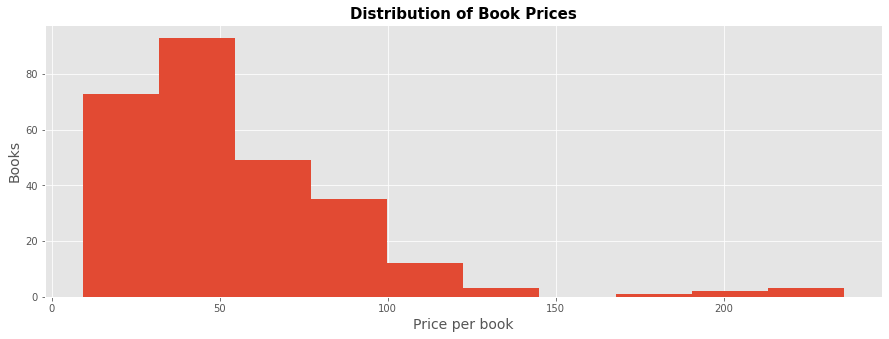

In [63]:
# What is the distribution of book prices?
plt.hist(data=df, x='Price')
plt.title('Distribution of Book Prices', size=15, fontweight='bold')
plt.xlabel('Price per book', size=14)
plt.ylabel('Books', size=14)

In [30]:
# df.round(2).mode()

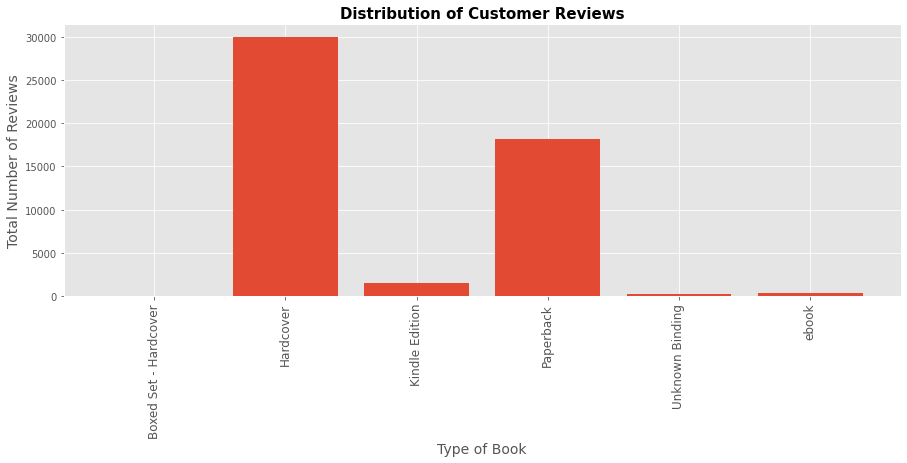

In [66]:
# What is the distribution of customer reviews?
keys = [type for type, df in df.groupby(['Type'])]

plt.bar(keys, df.groupby(['Type']).sum()['Reviews'])

plt.title('Distribution of Customer Reviews', size=15, fontweight='bold')
plt.xticks(keys, rotation='vertical', size=12)
plt.xlabel('Type of Book', size=14)
plt.ylabel('Total Number of Reviews', size=14)

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


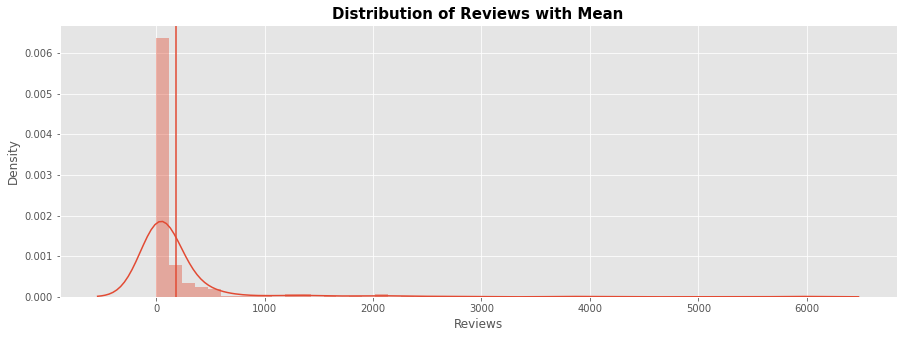

In [72]:
# What is the mean rating?
plt.axvline(x = np.mean(df['Reviews']))

plt.title('Distribution of Reviews with Mean', size=15, fontweight='bold')

sns.distplot(df['Reviews'])

In [33]:
# Find the highest rated books in the DataFrame
highest_rated = df.groupby('Title')['Rating'].sum().sort_values(ascending=False).head(10)
highest_rated

Title
Your First App: Node.js                                                                                     5.00
The Art of Computer Programming, Volumes 1-4a Boxed Set                                                     4.77
Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems    4.72
Build Web Applications with Java: Learn every aspect to build web applications from scratch                 4.67
Fluent Python: Clear, Concise, and Effective Programming                                                    4.67
ZX Spectrum Games Code Club: Twenty fun games to code and learn                                             4.62
The Linux Programming Interface: A Linux and Unix System Programming Handbook                               4.62
CLR via C# (Developer Reference)                                                                            4.58
Practical Object Oriented Design in Ruby                                                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


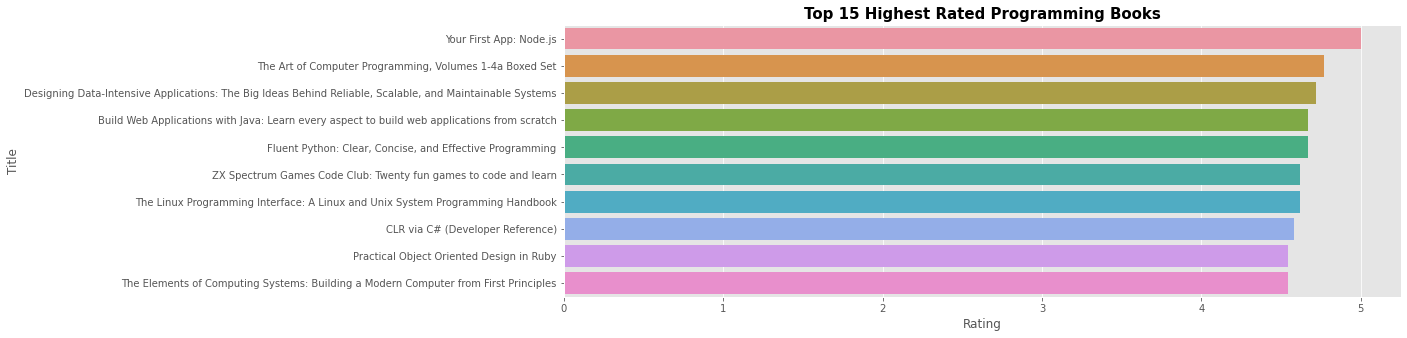

In [73]:
# What are the highest rated programming books?
high_bars = sns.barplot(highest_rated, highest_rated.index)
high_bars.set_title('Top 15 Highest Rated Programming Books', size=15, fontweight='bold')
high_bars

In [35]:
# Which books are specifically about Python?
python_books = df[df['Title'].str.contains('Python', flags=re.IGNORECASE)]
python_books

,Rating,Reviews,Title,Description,Pages,Type,Price
44,4.00,0,Python Programming Books Set: Python Programmi...,Quick & Easy Guide to Python Programming For B...,446,Paperback,23.86
56,4.35,126,"Python Crash Course: A Hands-On, Project-Based...","Python Crash Course is a fast-paced, thorough ...",560,Paperback,26.34
57,4.11,17,"Invent Your Own Computer Games with Python, 3r...",Invent Your Own Computer Games with Python tea...,370,Paperback,26.92
64,3.91,0,Python Programming For Beginners: Quick And Ea...,Quick & Easy Guide on Python Programming For B...,190,Paperback,29.02
75,4.27,153,Automate the Boring Stuff with Python: Practic...,If you've ever spent hours renaming files or u...,479,Paperback,33.06
85,4.11,125,How to Think Like a Computer Scientist: Learni...,Here you'll find a short introduction to Logo ...,288,Unknown Binding,36.13
95,3.87,122,Learn Python The Hard Way,This simple book is meant to give you a first ...,210,Unknown Binding,38.30
96,4.29,64,Effective Python: 59 Specific Ways to Write Be...,"Each item in Slatkin s ""Effective Python"" teac...",227,Paperback,38.62
120,3.86,8,Making Games with Python & Pygame,Making Games with Python & Pygame is a program...,366,Paperback,43.16
135,4.13,122,Python for Data Analysis,Python for Data Analysis is concerned with the...,400,Paperback,46.32


In [36]:
# How do the Python books rank?
book_group = python_books.sort_values(by=['Rating'], ascending=False)
book_ratings = book_group[:6]
book_ratings

,Rating,Reviews,Title,Description,Pages,Type,Price
194,4.67,78,"Fluent Python: Clear, Concise, and Effective P...",Python's simplicity lets you become productive...,792,Paperback,64.09
56,4.35,126,"Python Crash Course: A Hands-On, Project-Based...","Python Crash Course is a fast-paced, thorough ...",560,Paperback,26.34
96,4.29,64,Effective Python: 59 Specific Ways to Write Be...,"Each item in Slatkin s ""Effective Python"" teac...",227,Paperback,38.62
75,4.27,153,Automate the Boring Stuff with Python: Practic...,If you've ever spent hours renaming files or u...,479,Paperback,33.06
144,4.23,32,Introduction to Computation and Programming Us...,This book introduces students with little or n...,280,Paperback,49.18
135,4.13,122,Python for Data Analysis,Python for Data Analysis is concerned with the...,400,Paperback,46.32


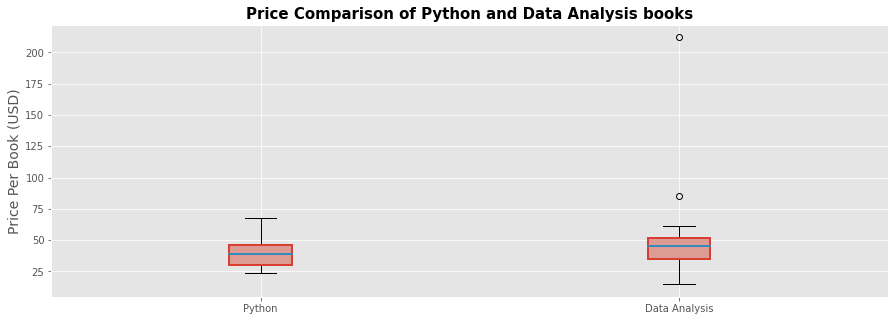

In [74]:
# Set up variables for the median prices of Python books compared to Data Analysis books
pb = df.loc[df.Title.str.contains('Python', flags=re.IGNORECASE)]['Price']
da = df.loc[df.Title.str.contains('Data', flags=re.IGNORECASE)]['Price']

# Create a boxplot with these variables
labels = ['Python', 'Data Analysis']
plt.style.use('ggplot')
boxes = plt.boxplot([pb, da], labels=labels, patch_artist=True, medianprops={'linewidth': 2})

# Set color for box outlines
for box in boxes['boxes']:
  box.set(color='#D93F30', linewidth=2)

# Change fill color
  box.set(facecolor='#DC9C93')

plt.title('Price Comparison of Python and Data Analysis books', size = 15, fontweight='bold')
plt.ylabel('Price Per Book (USD)', size=14)

plt.show()

In [38]:
# There are two price outliers, but I am not averaging prices in this EDA, so there's no need to remove them.

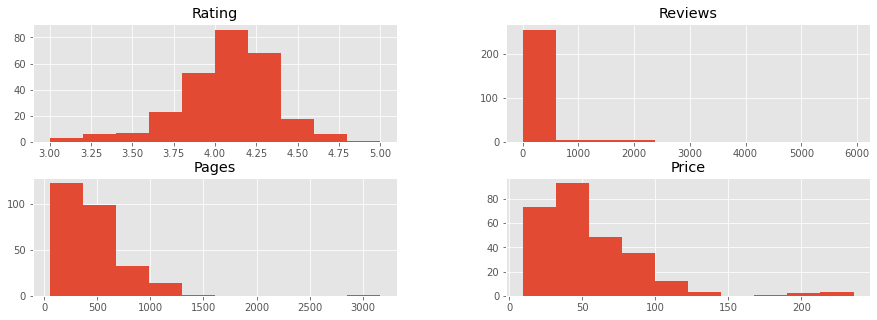

In [39]:
# Plot out all numerical columns
num_totals = df.hist()